## Student Performance Indicator

### 1) Problem Statement
  > This project understands how the student's performance(test score) is affected by other variables such as Gender, Ethinicity, Parental level of Education, Lunch, Test preperation course.

### 2) Data Collection 
  > Dataset Source-kaggle
  > The dataset consists of 8 columns and 1000 rows

#### Importing nessecary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as pandas Dataframe

In [3]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values 

In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check the statistics of data set

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
  * From above description of numerical data, all means arre very close to each other- between 66 and 68.05
  * All standard deviations are also close- between 14.6 and 15.19
  * While there is a minimum score 0 for math, for writing is much higher= 10 and for reading is 17 

### Exploring Data

In [11]:
print("Categories in 'gender' variable : ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable : ",end="  ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable : ",end="  ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable : ",end="  ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable : ",end="  ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in race_ethnicity variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :   ['standard' 'free/reduced']
Categories in 'test preparation course' variable :   ['none' 'completed']


In [12]:
# define numerical and categorical columns
numerical_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("We have {} numerical columns : {}".format(len(numerical_cols), numerical_cols))
print("We have {} categorical columns : {}".format(len(categorical_cols), categorical_cols))


We have 3 numerical columns : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical columns : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for Average Score and Total Score

In [ ]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()    
math_full=df[df['math_score']==100]['average'].count()
print("Number of students with full score in reading: ",reading_full)
print("Number of students with full score in writing: ",writing_full)   
print("Number of students with full score in math: ",math_full)


Number of students with full score in reading:  17
Number of students with full score in writing:  14
Number of students with full score in math:  7


In [21]:
reading_less_20=df[df['reading_score']<20]['average'].count()
writing_less_20=df[df['writing_score']<20]['average'].count()           
math_less_20=df[df['math_score']<20]['average'].count() 

print("Number of students with less than 20 score in reading: ",reading_less_20)
print("Number of students with less than 20 score in writing: ",writing_less_20)
print("Number of students with less than 20 score in math: ",math_less_20)

Number of students with less than 20 score in reading:  1
Number of students with less than 20 score in writing:  3
Number of students with less than 20 score in math:  4


### Insight
 * From above values we get students have performed the worst in maths
 * Best Performance in reading section

### Exploring Data (Visualization)

#### Visualize the average acroess the distribbution

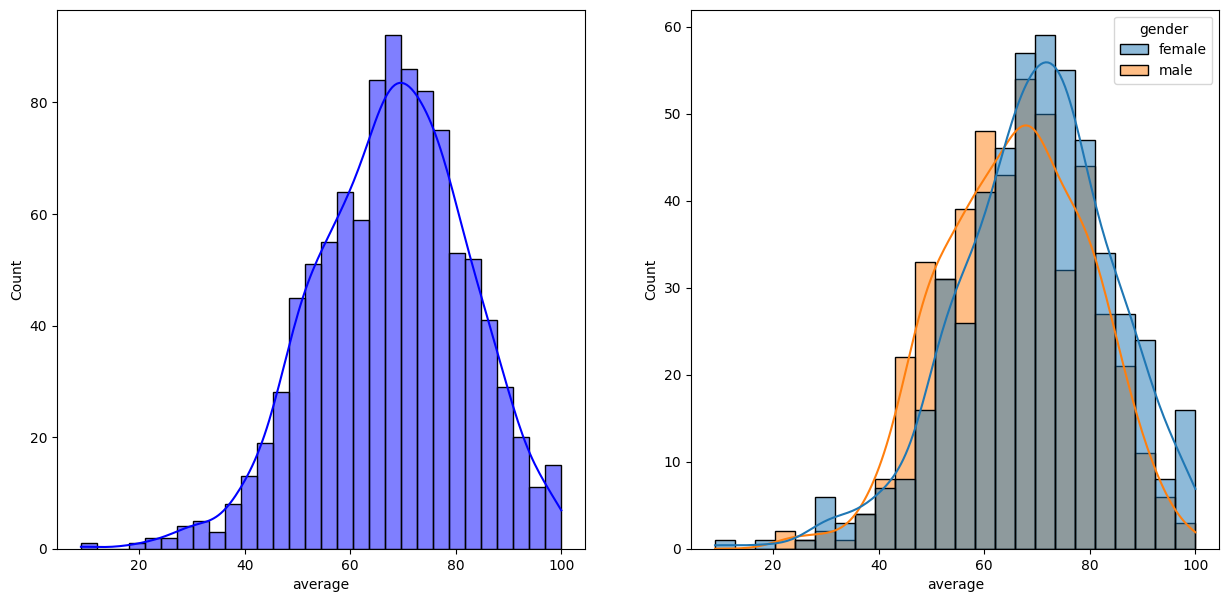

In [23]:
fig, axs=plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True,hue='gender')
plt.show()

#### Insights
 * Female students perform well than men students

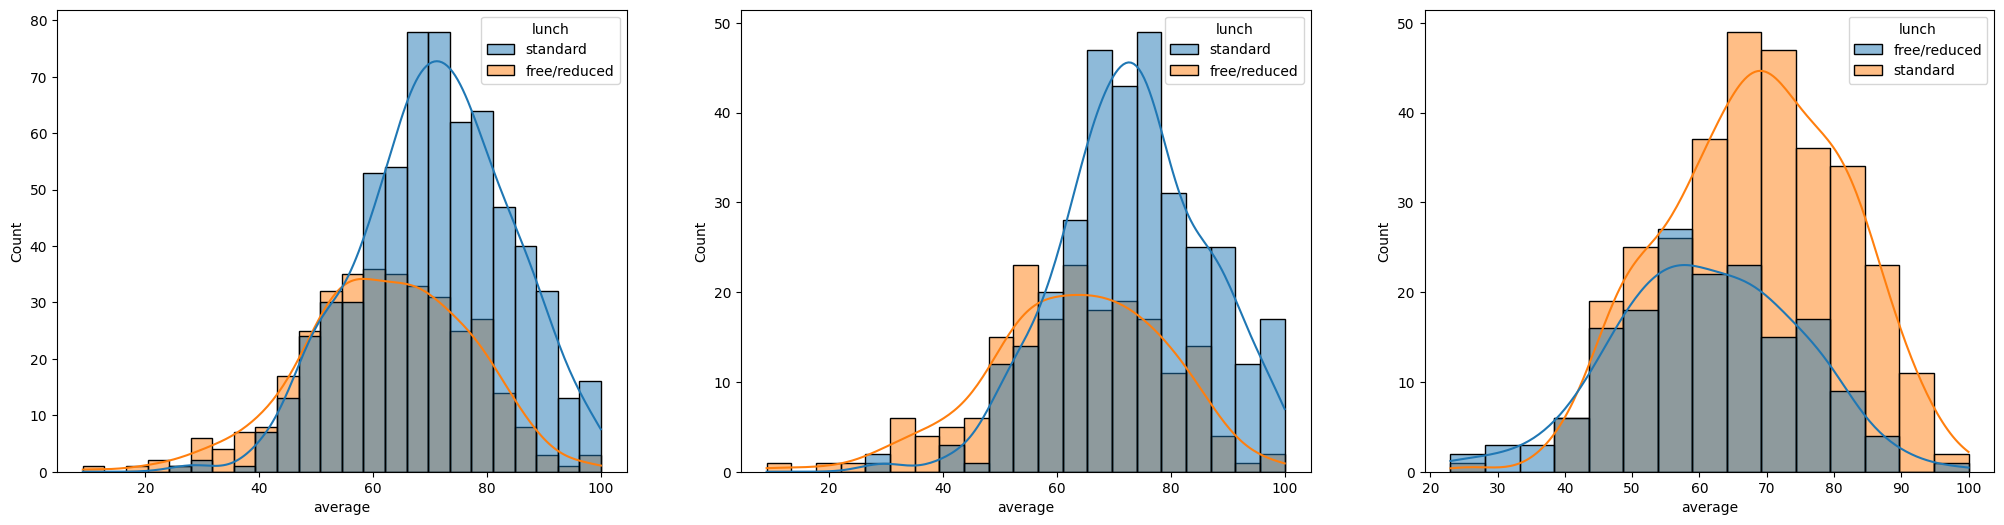

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


#### Insights
 * Standard lunch helps perform well in exams
 * standard lunch helps perform well in exams be it a male or a female